بارگذاری داده ها

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


شافل کردن داده ها و چاپ کردن ابعاد

In [3]:
import numpy as np

# Get the number of training examples
num_train_examples = len(x_train)

# Create a random index order
random_index = np.random.permutation(num_train_examples)

# Shuffle the training data and labels using the random index
x_train = x_train[random_index]
y_train = y_train[random_index]

print(x_train[0].shape)

(28, 28)


نمایش 10 تصویر نخست داده های آموزشی همراه برچسب آن ها

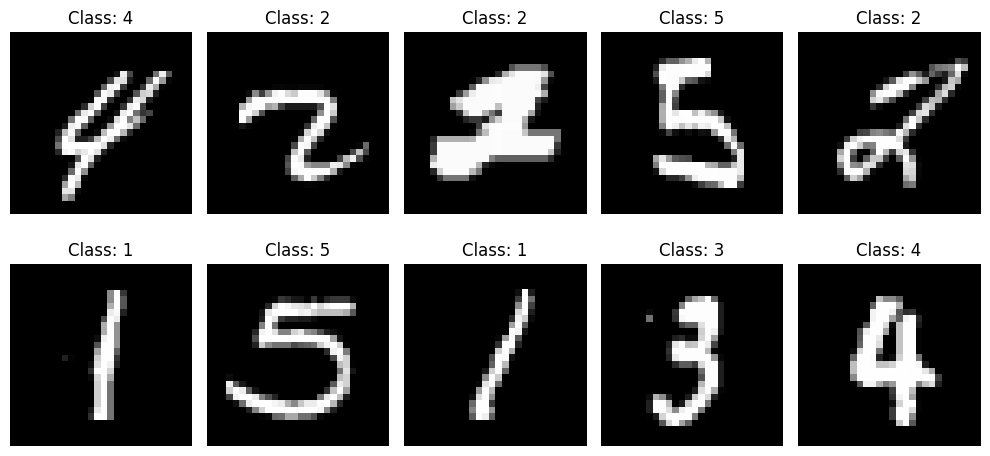

In [4]:
plt.figure(figsize=(10, 5))
for i in range(10):
    image = x_train[i]
    label = y_train[i]
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Class: {label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

مقادیر پیکسل ها را به محدوده 0 تا 1 تغیرر دهید.

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255.0

برچسب ها را به نمایش categorical تغییر دهید.

In [10]:
import tensorflow.keras as keras

# Convert training labels to categorical format
y_train = keras.utils.to_categorical(y_train, 10)

# Convert test labels to categorical format if needed
y_test = keras.utils.to_categorical(y_test, 10)

طراحی شبکه عصبی با ویژگی های گفته شده

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
# Create the neural network model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model with 'categorical_crossentropy' as the loss function
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


آموزش مدل با مشخصات گفته شده

In [14]:
# Train the model with categorical labels
model.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/15
938/938 [==============================] - 93s 98ms/step - loss: 0.4392 - accuracy: 0.9330 - val_loss: 0.0541 - val_accuracy: 0.9831
Epoch 2/15
938/938 [==============================] - 91s 97ms/step - loss: 0.0597 - accuracy: 0.9816 - val_loss: 0.0489 - val_accuracy: 0.9846
Epoch 3/15
938/938 [==============================] - 92s 99ms/step - loss: 0.0443 - accuracy: 0.9859 - val_loss: 0.0494 - val_accuracy: 0.9840
Epoch 4/15
938/938 [==============================] - 94s 100ms/step - loss: 0.0334 - accuracy: 0.9890 - val_loss: 0.0394 - val_accuracy: 0.9881
Epoch 5/15
938/938 [==============================] - 91s 97ms/step - loss: 0.0314 - accuracy: 0.9896 - val_loss: 0.0485 - val_accuracy: 0.9865
Epoch 6/15
938/938 [==============================] - 92s 98ms/step - loss: 0.0273 - accuracy: 0.9911 - val_loss: 0.0350 - val_accuracy: 0.9905
Epoch 7/15
938/938 [==============================] - 90s 96ms/step - loss: 0.0287 - accuracy: 0.9910 - val_loss: 0.0406 - val_accuracy

اجرای الگوریتم گفته شده روی آخرین لایه همگشتی و نمایش خروجی آن روی 10 تصویر نمونه

In [31]:
# Using CAM-Grad algorithm on the last convolutional layer
last_conv_layer = model.layers[-3]  # Get the last convolutional layer
grad_model = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image as PILImage

os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import tensorflow as tf
import keras

# Display
from IPython.display import Image, display
import matplotlib as mpl
import matplotlib.pyplot as plt


In [57]:
pil_image = PILImage.fromarray((x_train[0] * 255).astype('uint8'))  # Convert to 8-bit unsigned integers

# Save the PIL image temporarily
temp_image_path = "temp_image.png"
pil_image.save(temp_image_path)

# Display the image using IPython.display.Image
display(Image(filename=temp_image_path, width=400, height=400))


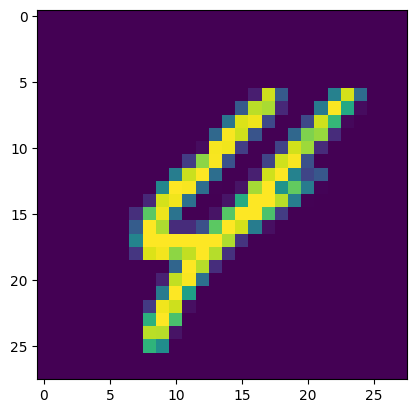

In [35]:
plt.imshow(x_train[0])
plt.show()

In [37]:
def get_img_array(img_path, size):
    img = keras.utils.load_img(img_path, target_size=size)
    array = keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )
    print(1)
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]
    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

1/1 [==============================] - 0s 254ms/step
Predicted: [[4.7569110e-27 9.5840501e-17 5.0731626e-26 1.7960880e-27 1.0000000e+00
  3.7507225e-16 3.5089878e-18 9.2531368e-18 1.6180940e-11 1.3213144e-12]]


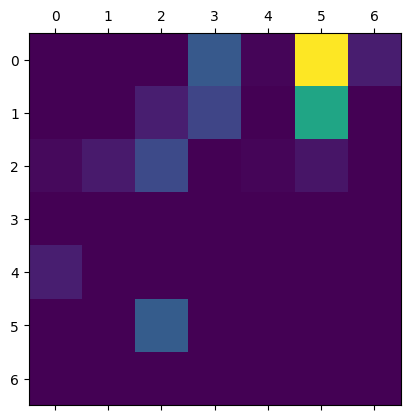

In [58]:
preds = model.predict(x_train[0].reshape((1, 28, 28, 1)))
print("Predicted:", preds)

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(x_train[0].reshape((1, 28, 28, 1)), model, last_conv_layer.name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

In [56]:
def save_and_display_gradcam(img, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.utils.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = mpl.colormaps["jet"]

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.utils.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path, width=400, height=400))


save_and_display_gradcam(x_train[0], heatmap, "x_train[0].png")

در بالا فقط برای یک تصویر انجام شده و باید برای 10 تصویر انجام دهیم.

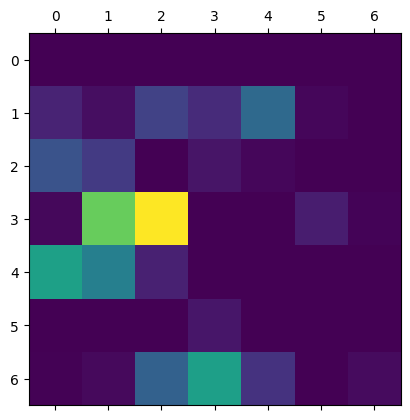

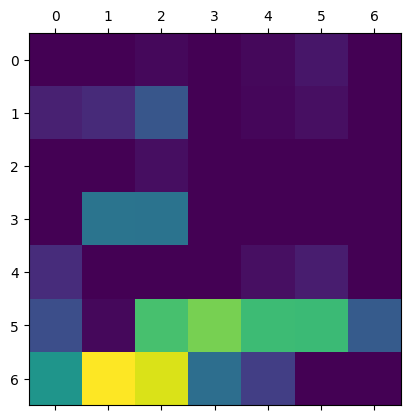

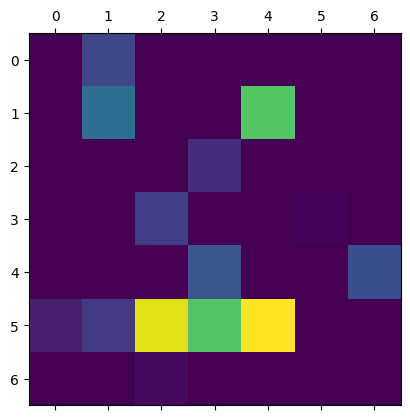

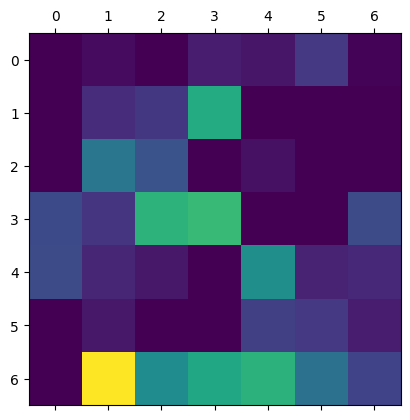

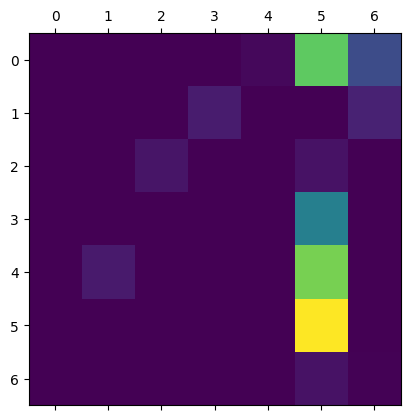

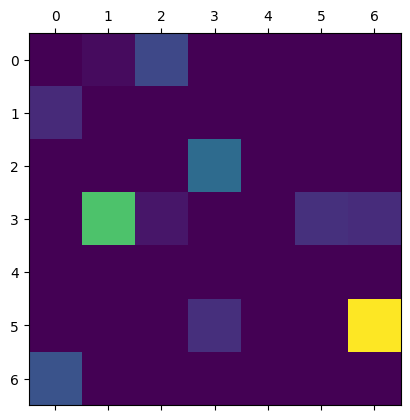

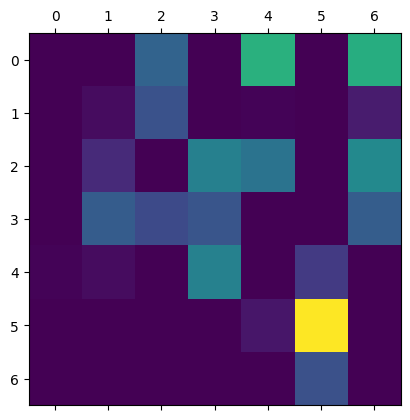

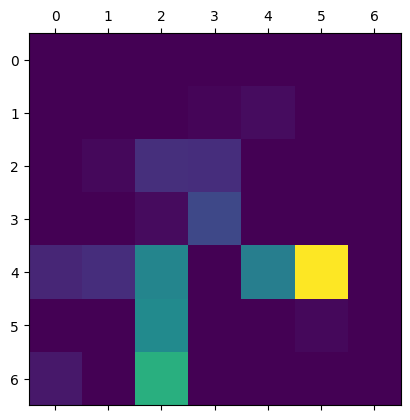

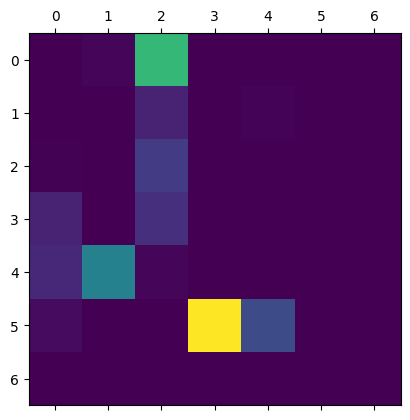

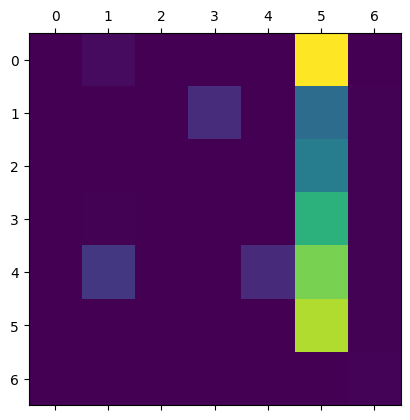

In [59]:
for i in range(1, 11):
    heatmap = make_gradcam_heatmap(x_train[i].reshape((1, 28, 28, 1)), model, last_conv_layer.name)
    plt.matshow(heatmap)
    plt.show()
    save_and_display_gradcam(x_train[i], heatmap, f"x_train[{i}].png")
